<a href="https://colab.research.google.com/github/MoralesCMaJo/Tarea-2--An-lisis-de-series-temporales/blob/main/9_The_ARCH_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando los paquetes relevantes
!pip install arch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2
from math import sqrt
import seaborn as sns
sns.set()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.7/981.7 kB 10.2 MB/s eta 0:00:00


In [ ]:
#Importando de datos y preprocesamiento
from google.colab import drive
drive.mount('/content/drive')
import shutil
# Ruta del archivo en Google Drive
ruta_drive = "/content/drive/My Drive/Index_2023.csv"
# Ruta de destino en Google Colab
ruta_colab = "/content/Index_2023.csv"
# Copia el archivo desde Google Drive a Google Colab
shutil.copy(ruta_drive, ruta_colab)
raw_csv_data = pd.read_csv("Index_2023.csv")
df_comp=raw_csv_data.copy()
df_comp.Date = pd.to_datetime(df_comp.Date, format='%Y-%m-%d', dayfirst=True)
df_comp.set_index("Date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp = df_comp.ffill()
df_comp['market_value']=df_comp.ftse
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


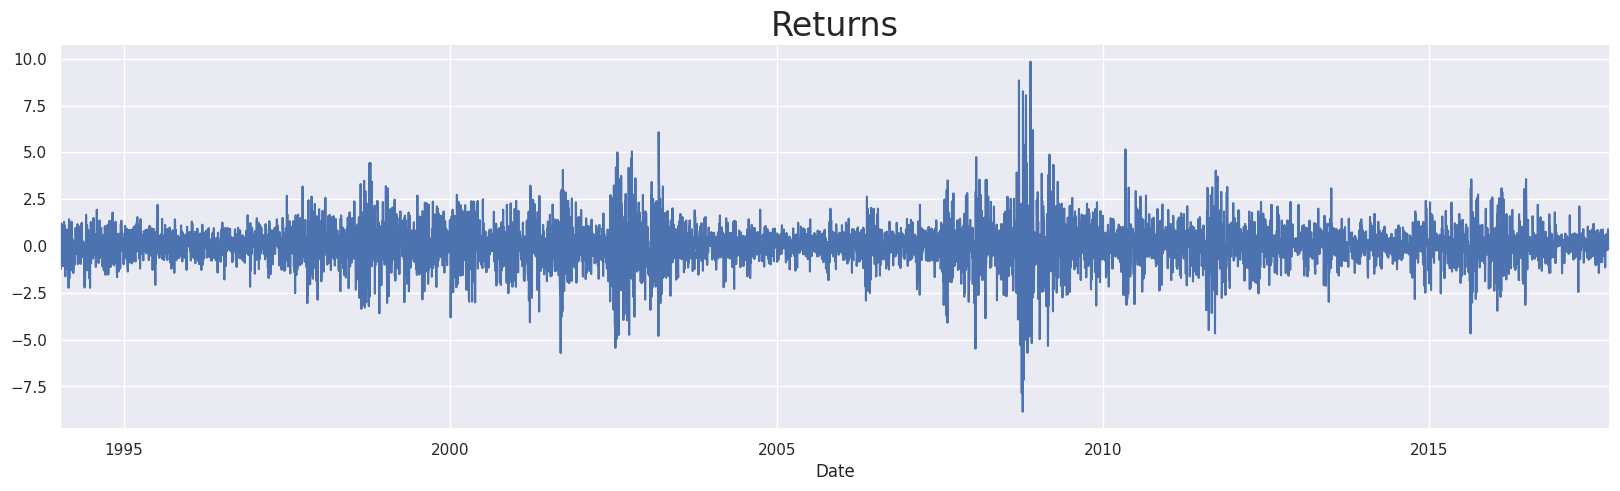

In [ ]:
#El Test LLR
#Este código realiza una prueba de razón de verosimilitudes (Likelihood Ratio Test)
#Compara la bondad del ajuste de dos modelos ARIMA y se usa para determinar si un modelo es significativamente
#mejor que el otro. La función calcula el valor p asociado con esta prueba y lo redondea a tres decimales.
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit(start_ar_lags = 11).llf
    L2 = mod_2.fit(start_ar_lags = 11).llf
    LR = (2*(L2-L1))
    p = chi2.sf(LR, DF).round(3)
    return p

#Creando rendimientos
df['returns'] = df.market_value.pct_change(1)*100

#Creando rendimientos al cuadrado
df['sq_returns'] = df.returns.mul(df.returns)

#Comparamos rendimientos frente a rendimientos al cuadrado
df.returns.plot(figsize=(20,5))
plt.title("Returns", size = 24)
plt.show()

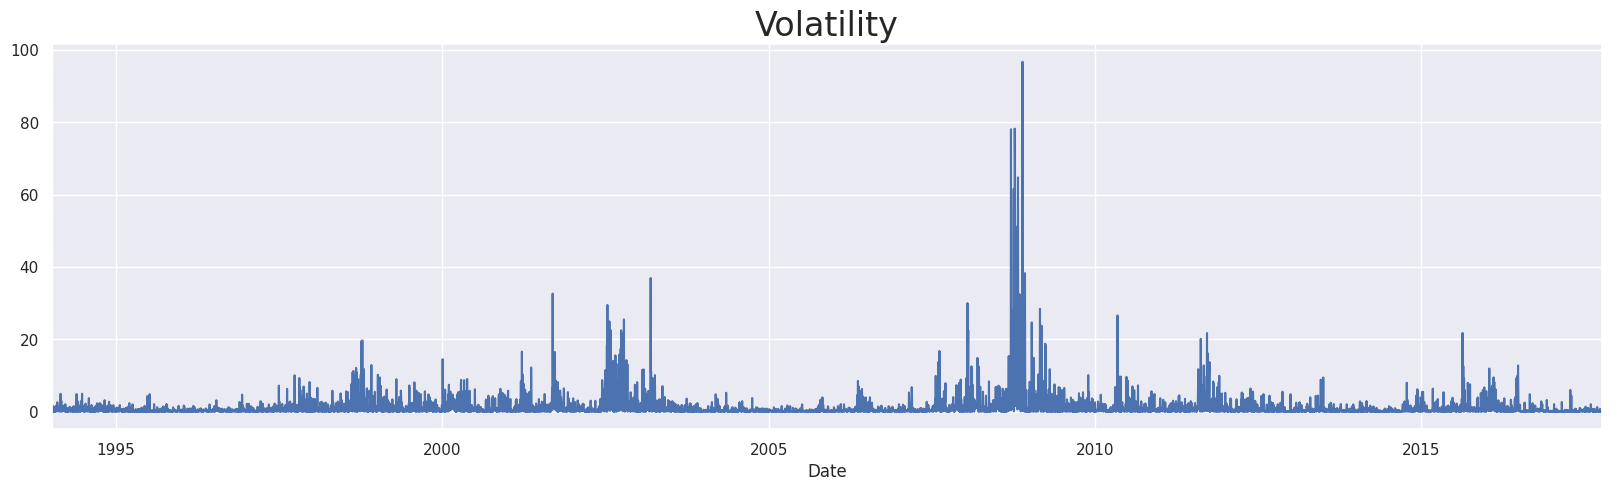

In [ ]:
df.sq_returns.plot(figsize=(20,5))
plt.title("Volatility", size = 24)
plt.show()

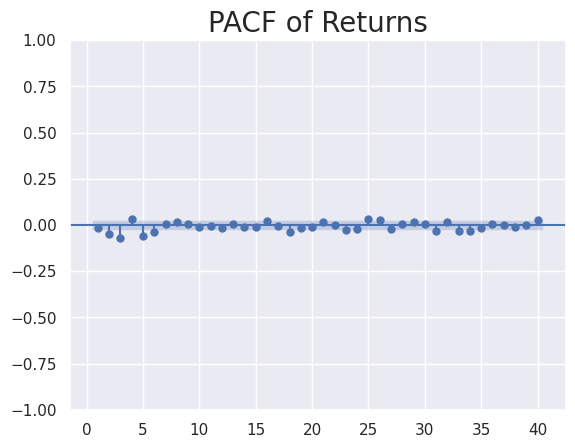

In [ ]:
sgt.plot_pacf(df.returns[1:], lags = 40, alpha = 0.05, zero = False , method = ('ols'))
plt.title("PACF of Returns", size = 20)
plt.show()

In [ ]:
#El método arch_model()

from arch import arch_model
model_arch_1 = arch_model(df.returns[1:])
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 8364.108094821579
Iteration:     10,   Func. Count:     65,   Neg. LLF: 8357.41091025245
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8357.41091025245
            Iterations: 11
            Function evaluations: 69
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8357.41
Distribution:                  Normal   AIC:                           16722.8
Method:            Maximum Likelihood   BIC:                           16749.8
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:            

The Simple ARCH

In [ ]:
model_arch_1 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 1)
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())
model_arch_1 = arch_model(df.returns[1:], mean = "AR", lags = [2, 3, 6], vol = "ARCH", p = 1, dist = "ged")
results_arch_1 = model_arch_1.fit(update_freq = 5)
print(results_arch_1.summary())

Iteration:      5,   Func. Count:     30,   Neg. LLF: 9161.03989929352
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9161.03989929352
            Iterations: 6
            Function evaluations: 33
            Gradient evaluations: 6
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9161.04
Distribution:                  Normal   AIC:                           18328.1
Method:            Maximum Likelihood   BIC:                           18348.3
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        06:00:01   Df Model:                            1
            

Higher-Lag ARCH Models

In [ ]:
model_arch_2 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 2)
results_arch_2 = model_arch_2.fit(update_freq = 5)
print(results_arch_2.summary())

Iteration:      5,   Func. Count:     39,   Neg. LLF: 8914.232505694972
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8914.229610657447
            Iterations: 7
            Function evaluations: 49
            Gradient evaluations: 7
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8914.23
Distribution:                  Normal   AIC:                           17836.5
Method:            Maximum Likelihood   BIC:                           17863.4
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:                        06:00:42   Df Model:                            1
          

In [ ]:
model_arch_3 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 3)
results_arch_3 = model_arch_3.fit(update_freq = 5)
print(results_arch_3.summary())



Iteration:      5,   Func. Count:     41,   Neg. LLF: 9253.040969456142
Iteration:     10,   Func. Count:     75,   Neg. LLF: 8700.594036848734
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8700.594036848734
            Iterations: 11
            Function evaluations: 80
            Gradient evaluations: 11
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8700.59
Distribution:                  Normal   AIC:                           17411.2
Method:            Maximum Likelihood   BIC:                           17444.8
                                        No. Observations:                 6199
Date:                Sat, Oct 14 2023   Df Residuals:                     6198
Time:          

In [ ]:
model_arch_13 = arch_model(df.returns[1:], mean = "Constant", vol = "ARCH", p = 13)
results_arch_13 = model_arch_13.fit(update_freq = 5)
print(results_arch_13.summary())

Iteration:      5,   Func. Count:     91,   Neg. LLF: 219471.16932628525
Iteration:     10,   Func. Count:    180,   Neg. LLF: 9539.858624861496
Iteration:     15,   Func. Count:    268,   Neg. LLF: 8627.383333843962
Iteration:     20,   Func. Count:    358,   Neg. LLF: 8404.715063674092
Iteration:     25,   Func. Count:    445,   Neg. LLF: 8372.329263434869
Optimization terminated successfully    (Exit mode 0)
            Current function value: 8372.329088176237
            Iterations: 28
            Function evaluations: 492
            Gradient evaluations: 28
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8372.33
Distribution:                  Normal   AIC:                           16774.7
Method:            Maximum Likelih